In [1]:
#Import Libraries
import time
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import tensorflow as tf
from tensorflow.contrib.keras import backend as K
from tensorflow.contrib.keras.api.keras.models import Sequential
from tensorflow.contrib.keras.api.keras.layers import Dense, Activation
from tensorflow.contrib.keras.api.keras.optimizers import SGD
from tensorflow.contrib.keras.python.keras.utils import np_utils

In [2]:
#Initialize random generator
np.random.seed(2017)

In [3]:
#Read input dataset
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_features=mnist.train.images
train_labels=mnist.train.labels
test_features=mnist.test.images
test_labels=mnist.test.labels
img_rows=28
img_cols=28

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [4]:
num_classes = len(np.unique(train_labels))
num_input_nodes = img_rows*img_cols

print ("Number of training samples: %d"%train_features.shape[0])
print ("Number of test samples: %d"%test_features.shape[0])
print ("Number of classes: %d"%num_classes)

Number of training samples: 55000
Number of test samples: 10000
Number of classes: 10


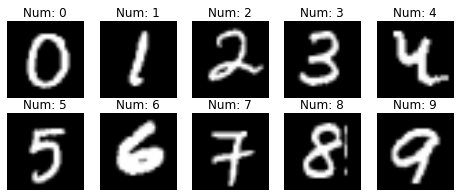

In [5]:
#Show sample pictures from dataset
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    features_idx = train_features[train_labels[:]==i,:]
    ax.set_title("Num: " + str(i))
    plt.imshow(np.reshape(features_idx[1],(img_rows,img_cols))*255, cmap="gray")
plt.show()

In [6]:
# reshape images to column vectors
train_features = train_features.reshape(train_features.shape[0], img_rows*img_cols)
test_features = test_features.reshape(test_features.shape[0], img_rows*img_cols)

In [7]:
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [8]:
#Define Neural Network: Input -> Dense Layer 1 -> Tanh -> Dense Layer 2 -> Softmax -> Output
def simple_nn():
    # initialize model
    model = Sequential()
    # add an input layer and a hidden layer
    model.add(Dense(100, input_dim = num_input_nodes))
    # add activation layer to add non-linearity
#    model.add(Activation('sigmoid'))
    model.add(Activation('tanh'))
    # to add ReLu instead of sigmoid: model.add(Activation('relu'))
    # combine above 2 layers: model.add(Dense(100, input_dim=784),Activation('sigmoid'))
    # add output layer
    model.add(Dense(num_classes))
    # add softmax layer
    model.add(Activation('softmax'))
    return model


In [9]:
# define and compile model
model = simple_nn()

In [10]:
# define optimizer
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# print model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 79,510.0
Trainable params: 79,510.0
Non-trainable params: 0.0
_________________________________________________________________


In [12]:
#Train model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=256, epochs=50, verbose=2, validation_split=0.2)
end = time.time()
print("Model took %0.2f seconds to train"%(end - start))

Train on 44000 samples, validate on 11000 samples
Epoch 1/50
1s - loss: 0.0822 - acc: 0.3279 - val_loss: 0.0726 - val_acc: 0.4677
Epoch 2/50
0s - loss: 0.0652 - acc: 0.5498 - val_loss: 0.0571 - val_acc: 0.6643
Epoch 3/50
0s - loss: 0.0522 - acc: 0.7048 - val_loss: 0.0458 - val_acc: 0.7593
Epoch 4/50
0s - loss: 0.0433 - acc: 0.7648 - val_loss: 0.0383 - val_acc: 0.8043
Epoch 5/50
0s - loss: 0.0372 - acc: 0.8040 - val_loss: 0.0331 - val_acc: 0.8321
Epoch 6/50
0s - loss: 0.0330 - acc: 0.8262 - val_loss: 0.0295 - val_acc: 0.8495
Epoch 7/50
0s - loss: 0.0301 - acc: 0.8390 - val_loss: 0.0270 - val_acc: 0.8604
Epoch 8/50
0s - loss: 0.0279 - acc: 0.8476 - val_loss: 0.0251 - val_acc: 0.8682
Epoch 9/50
0s - loss: 0.0262 - acc: 0.8550 - val_loss: 0.0236 - val_acc: 0.8748
Epoch 10/50
0s - loss: 0.0248 - acc: 0.8609 - val_loss: 0.0224 - val_acc: 0.8772
Epoch 11/50
0s - loss: 0.0237 - acc: 0.8652 - val_loss: 0.0214 - val_acc: 0.8806
Epoch 12/50
0s - loss: 0.0228 - acc: 0.8689 - val_loss: 0.0206 - val

In [13]:
#Plot training parameters
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

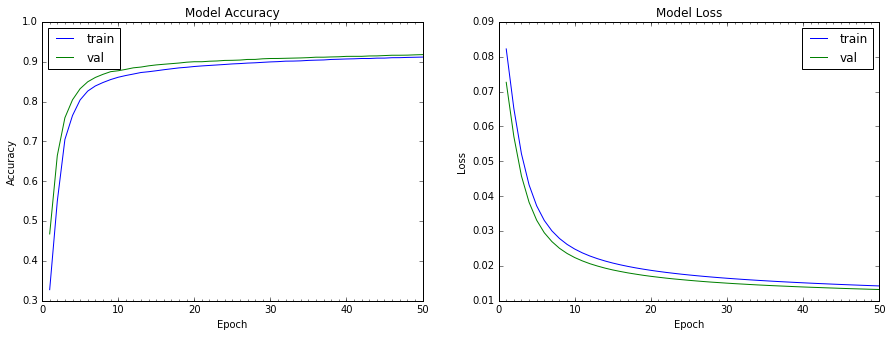

In [14]:
plot_model_history(model_info)

In [15]:
# Accuracy = percentage of mispredicted images, mispredicted samples
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class)
    bad_images=(predicted_class != true_class)
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100, bad_images, predicted_class, true_class)

In [16]:
#Print Statistics
acc,bad_img, bad_labels, true_labels=accuracy(test_features, test_labels, model)
print ("Accuracy on test data is: %0.2f"%acc)

Accuracy on test data is: 91.69


In [17]:
#Plot sample from misclassified images
def plot_bad_images(images, bad_img, bad_labels, true_labels):
    n = sum(bad_img)
    print("There are: %d mispredicted images"%n)
    bad_image_indices = []
    num_bad=0
    for j in range(bad_img.shape[0]):
        if bad_img[j]==True:
            bad_image_indices.append(j)
            num_bad +=1

    fig1 = plt.figure(figsize=(15,20))
    for j in range(50):
        ax = fig1.add_subplot(10, 10, j+1)
        js=np.random.randint(0,num_bad)
        j1=bad_image_indices[js]
        p=np.reshape(images[j1],(-1,28))
        ax.imshow(p, cmap = "gray")
        ax.set_title(str(bad_labels[j1])+"/"+str(true_labels[j1]))
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))

    plt.show()

There are: 831 mispredicted images


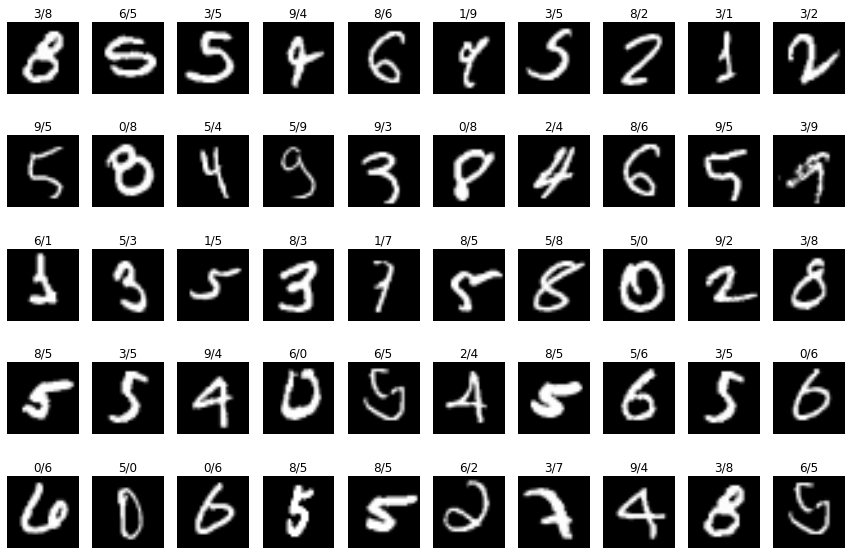

In [18]:
plot_bad_images(test_features,bad_img, bad_labels,true_labels)

In [19]:
# Now define a "deep" neural network
# Dense(512)->Dense(256)->Dense(128)->Dense(64)->Dense(32)->Output
def deep_nn():
    model = Sequential()
    model.add(Dense(512, input_dim=num_input_nodes))
    model.add(Activation('relu'))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

In [20]:
#Define and print model statistics
model = deep_nn()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
__________

In [21]:
# Define optimizer
sgd = SGD(lr=0.05)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=256,
                        epochs=100, verbose=2, validation_split=0.1)
end = time.time()
print("Model took %0.2f seconds to train"%(end - start))

Train on 49500 samples, validate on 5500 samples
Epoch 1/100
1s - loss: 0.0901 - acc: 0.1249 - val_loss: 0.0897 - val_acc: 0.1718
Epoch 2/100
0s - loss: 0.0895 - acc: 0.1820 - val_loss: 0.0891 - val_acc: 0.2142
Epoch 3/100
0s - loss: 0.0888 - acc: 0.2013 - val_loss: 0.0883 - val_acc: 0.2069
Epoch 4/100
0s - loss: 0.0878 - acc: 0.2009 - val_loss: 0.0870 - val_acc: 0.2071
Epoch 5/100
0s - loss: 0.0862 - acc: 0.2022 - val_loss: 0.0849 - val_acc: 0.2153
Epoch 6/100
0s - loss: 0.0839 - acc: 0.2221 - val_loss: 0.0826 - val_acc: 0.2505
Epoch 7/100
0s - loss: 0.0818 - acc: 0.2672 - val_loss: 0.0805 - val_acc: 0.3047
Epoch 8/100
0s - loss: 0.0799 - acc: 0.3287 - val_loss: 0.0785 - val_acc: 0.3809
Epoch 9/100
0s - loss: 0.0777 - acc: 0.3933 - val_loss: 0.0757 - val_acc: 0.4364
Epoch 10/100
0s - loss: 0.0746 - acc: 0.4315 - val_loss: 0.0715 - val_acc: 0.4633
Epoch 11/100
0s - loss: 0.0702 - acc: 0.4546 - val_loss: 0.0662 - val_acc: 0.4862
Epoch 12/100
1s - loss: 0.0655 - acc: 0.4933 - val_loss: 0

In [23]:
# compute test accuracy
acc,bad_img, bad_labels, true_labels=accuracy(test_features, test_labels, model)
print ("Accuracy on test data is: %0.2f"%acc)

Accuracy on test data is: 95.62


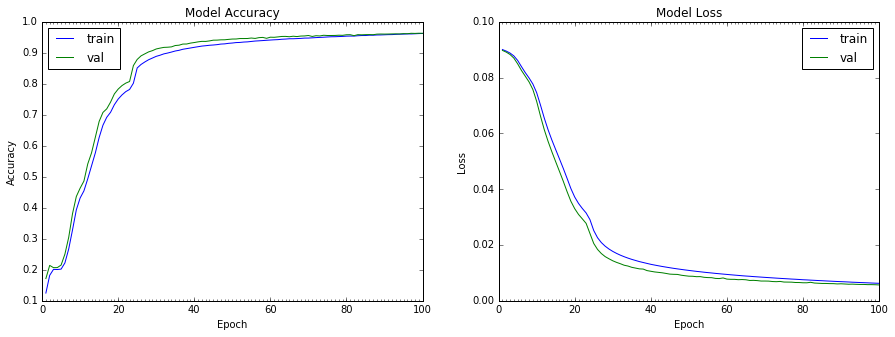

In [24]:
# plot model history
plot_model_history(model_info)

There are: 438 mispredicted images


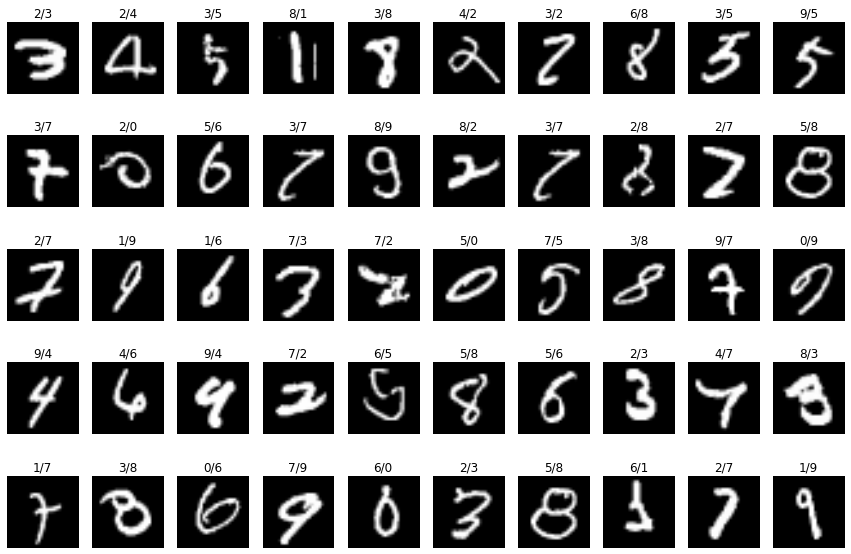

In [25]:
# plot some mispredicted pictures
plot_bad_images(test_features,bad_img, bad_labels,true_labels)